## Ordinary Differential Equations First Order with Scipy

To solve first-order ordinary differential equations (ODEs) using `scipy`, you can follow these steps:

1. **Define the ODE function**:
   Define a Python function that represents your first-order ordinary differential equation. This function should take two arguments: the current values of the dependent variable(s) and the current value of the independent variable.

2. **Set up initial conditions**:
   Specify the initial condition(s) for the dependent variable(s).

3. **Create an array of time points**:
   Decide on the range of independent variable values (time points) over which you want to solve the ODE. This could be a linear space or a custom array.

4. **Use `scipy.odeint` to solve the ODE**:
   Call the `odeint` function, providing it with the ODE function, initial condition(s), and the array of time points.


[[1.        ]
 [0.57375344]
 [0.329193  ]
 [0.1888756 ]
 [0.10836801]
 [0.06217651]
 [0.03567399]
 [0.02046807]
 [0.01174363]
 [0.00673795]]


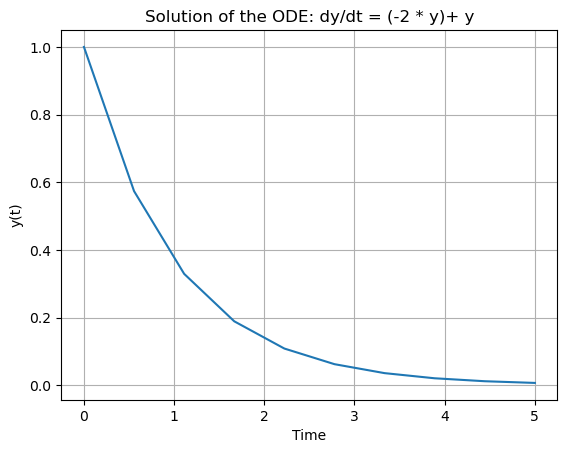

In [18]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the ODE function
def model(y, t):
    dydt = (-2 * y)+ y # Example: dy/dt = -2y + y
    return dydt

# Set initial condition
y0 = 1.0

# Create an array of time points
t = np.linspace(0, 5, 10)

# Solve the ODE
solution = odeint(model, y0, t)
print(solution)

# Plot the solution
plt.plot(t, solution)
plt.xlabel('Time')
plt.ylabel('y(t)')
plt.title('Solution of the ODE: dy/dt = (-2 * y)+ y')
plt.grid(True)
plt.show()


**Coupled first order ODEs**

$$ y_1' = y_1 + y_2^2 + 3x \hspace{10mm} y_1(0)=0$$
$$ y_2' = 3y_1 + y_2^3 - \cos(x) \hspace{10mm} y_2(0)=0$$

Letting $S=(y_1, y_2)$ we need to write a function that returns $dS/dx = (dy_1/dx, dy_2/dx)$. The function $dS/dx$ can take in $S=(y_1, y_2)$ and $x$

[[ 0.          0.        ]
 [ 0.01968244 -0.10876475]
 [ 0.08337021 -0.2028956 ]
 [ 0.19738701 -0.26589214]
 [ 0.36635914 -0.27864019]
 [ 0.59310239 -0.21971655]
 [ 0.88089111 -0.06727013]
 [ 1.23971243  0.20074117]
 [ 1.69857604  0.62113788]
 [ 2.33733216  1.32593   ]]


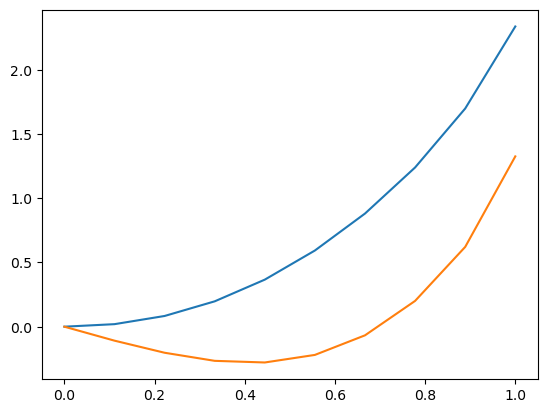

In [8]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def dSdx(S, x):
    y1, y2 = S
    return [y1 + y2**2  + 3*x,
           3*y1 + y2**3 - np.cos(x)]
y1_0 = 0
y2_0 = 0
S_0 = (y1_0, y2_0)

x = np.linspace(0, 1, 10)
sol = odeint(dSdx, S_0, x)
print(sol)

y1_sol = sol.T[0]
y2_sol = sol.T[1]

plt.plot(x, y1_sol)
plt.plot(x, y2_sol)

Solving second-order Ordinary Differential Equations (ODEs) using SciPy can be approached by converting them into a system of first-order equations. SciPy’s integrate module provides functions like odeint and solve_ivp for integrating ODEs.
Here’s a general approach to solve a second-order ODE using SciPy:


1. **Define the ODE as a system of first-order equations:** For a second-order ODE of the form
   $$ \frac {d^2y}{dt^2}​=f(y,\frac{dy}{dt},t)$$
you can introduce a new variable $( v = \frac{dy}{dt} )$ and rewrite it as two first-order ODEs:

$$\frac{dy}{dt}​=v$$
$$\frac{dv}{dt}​=f(y,v,t)$$


2. **Implement the system in Python:** Create a function that returns the derivatives of ( y ) and ( v ) as a list or array.


3. **Set initial conditions:** You need to provide initial values for both ( y ) and ( v ).


4. **Choose a solver:** Use `odeint` to integrate the system over a time interval.


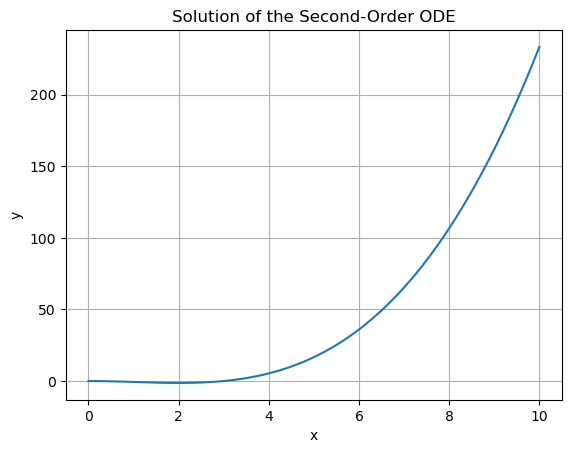

In [20]:
import numpy as np
from scipy.integrate import odeint

def system(yv, x):
    y, v = yv
    dydt = v
    dvdt = 2 * x - 2
    return [dydt, dvdt]

# Set initial conditions
y0 = [0.0, 0.0]  # Initial values for y and v
x_values = np.linspace(0, 10, 100)  # Time points for integration

# Integrate the system using odeint
solution = odeint(system, y0, x_values)

# Extract y values from the solution
y_values = solution[:, 0]

# Plot the result (you can use matplotlib for visualization)
import matplotlib.pyplot as plt
plt.plot(x_values, y_values)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solution of the Second-Order ODE')
plt.grid(True)
plt.show()
